#### 42/44

In [4]:
# Python Version 3.9.13, conda version 22.9.0 (conda -V)

In [278]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import matplotlib.pyplot as plt # v 3.5.2
import pandas_profiling as pp # v 3.6.6
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

%matplotlib inline

ww.filterwarnings("ignore")
%matplotlib inline

## [Logistic Regression – Binary Classification]

In [343]:
df = pd.read_csv(r"/Users/yelim/Documents/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/loan_default_data_set.csv")

## 1.

In [344]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [345]:
df.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18042.000000,20000.000000,18441.000000,20000.000000
mean,107439.032714,12230.735330,280.710050,146.100300,285.12085,0.156550,0.029700,0.030000,352.496791,0.616050,1.053050,0.272950,0.164150,0.490867,0.484157,0.465007,0.550964,0.250000,166373.900129,0.100000
std,22365.573172,3060.432745,73.238059,38.603134,64.25718,0.469524,0.176407,0.170591,1784.459199,1.158533,2.035766,0.487094,0.376977,0.129604,0.122891,0.130913,0.128403,0.433024,33444.974846,0.300008
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000
25%,92212.563363,10151.128043,231.000000,120.000000,242.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403926,0.401141,0.377850,0.464195,0.000000,143504.239600,0.000000
50%,107711.034250,12238.862545,280.000000,146.000000,285.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490365,0.485525,0.464847,0.551765,0.000000,166462.899700,0.000000
75%,122751.428100,14286.417122,330.000000,172.000000,330.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578311,0.567996,0.553581,0.638316,0.250000,188903.520800,0.000000
max,200000.000000,25000.000000,560.000000,300.000000,550.00000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.000000


In [346]:
df.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

### a. Which variables contain missing values? How would you go about dealing with these missing values? Pick one method for dealing with missing values so that in the remainder of the assignment, you are working with data that has no missing values.

There is a total of 20,000 observations in this data set. There are 20 predictor variables with one binary response variable (Def_ind). For the response variable, 1 means that the account was defaulted after an account 
was approved and opened with bank XYZ in the past 18 month and 0 means that the account not defaulted. There are missing values for 'pct_card_over_50_uti ', 'rep_income', and 'rep_education' which are tercentage of open accounts with over 50% utilization, annual income (self-reported by applicant and not verified), and education level in the same order. I would impute the missing values with the mean for numerical values, and for categorical values, I would impute missing values with the mode.

In [347]:
column_means = df.mean()
df.fillna(column_means, inplace=True)

column_modes = df.mode().iloc[0]
df.fillna(column_modes, inplace=True)

In [348]:
df['rep_education_highschool'] = np.where(df['rep_education'] == 'high_school', 1 ,0)
df['rep_education_college'] = np.where(df['rep_education'] == 'college', 1 ,0)
df['rep_education_graduate'] = np.where(df['rep_education'] == 'graduate', 1 ,0)
df['rep_education_other'] = np.where(df['rep_education'] == 'other', 1 ,0)

In [349]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind,rep_education_highschool,rep_education_college,rep_education_graduate,rep_education_other
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,0.513934,0.550866,0,118266.32130,college,0,0,1,0,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0.418016,0.550964,0,89365.05765,college,0,0,1,0,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0.341627,0.451417,0,201365.12130,college,0,0,1,0,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,0.542940,0.607843,0,191794.48550,college,0,0,1,0,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0.632934,0.573680,0,161465.36790,graduate,0,0,0,1,0


### b. Which education level is underrepresented in the data?
Based on the following results, 'other' level is underrepresented in the data.

In [350]:
df['rep_education'].value_counts().idxmin()

'other'

### c.	Are the classes balanced in the data set? 
The classes are imbalanced in the data set.

In [351]:
df['Def_ind'].value_counts()

0    18000
1     2000
Name: Def_ind, dtype: int64

### d.	How would you describe the distribution of “rep_income”? Is it skewed or approximately normal?
By looking at the histogram below, I would describe the distribution as right-skewed.

array([[<AxesSubplot:title={'center':'rep_income'}>]], dtype=object)

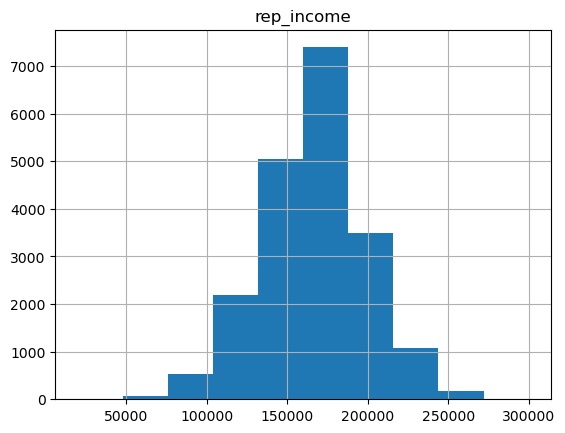

In [352]:
df.hist('rep_income')

### e.	Group default status (“Def_Ind”) by education level (“rep_education”). Which education level is more likely to default on loans?
Looking at the result, education level of high school is the most likely to default on loans.

In [353]:
df.groupby('rep_education')['Def_ind'].mean()

rep_education
college        0.096968
graduate       0.081879
high_school    0.115732
other          0.077465
Name: Def_ind, dtype: float64

### f.	Does anything else stand out?  Multicollinearity?

By looking at the VIF scores, there seems to be multicollinearity for tot_balance, avg_bal_cards, credit_age, credit_age_good_account, credit_card_age,uti_open_card, pct_over_50_uti, uti_max_credit_line, pct_card_over_50_uti, and rep_income. 


In [354]:
df.drop(columns = "rep_education", inplace =  True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Features"] = X.columns 

# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

,Features,VIF Scores
0,tot_balance,1.982153
1,avg_bal_cards,1.980952
2,credit_age,5.438938
3,credit_age_good_account,2.759174
4,credit_card_age,3.630879
5,num_acc_30d_past_due_12_months,3.196221
6,num_acc_30d_past_due_6_months,3.005729
7,num_mortgage_currently_past_due,2.989301
8,tot_amount_currently_past_due,4.084154
9,num_inq_12_month,5.407794


## 2. Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

In [356]:
###df.drop(columns = "rep_education", inplace =  True)
X = df.loc[:, df.columns != 'Def_ind']
y = df['Def_ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

## 3. Fit the model, report, and interpret the accuracy, precision, and recall of the model (5 points)

Accuracy of 0.899(~=90) means that the model makes about 90 correct predicitions out of 100 total examples. Precision of 0.639 means that when the model predicts an approval for the application, it is correct 63.9% of the time. Recall of 0.084 means that the model correctly identifies 8.4% of all approvals. 

In [357]:
## Fitting the model
model = LogisticRegression(random_state=5).fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(accuracy, precision, recall)

0.8986666666666666 0.6385542168674698 0.08399366085578447


## 4.  Produce a confusion matrix and interpret it (5 points)
The confustion matrix shows that the model made 5339 correctly predicted approvals, 30 falsely predicted denials,  578 falsely predicted approvals, and 53 correctly predicted denials. It tells us the model made 5339+53 correct predictions and 30+578 incorrect predictions. 

In [358]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[5339   30]
 [ 578   53]]


## 5. Plot a ROC/AUC curve (2 points)

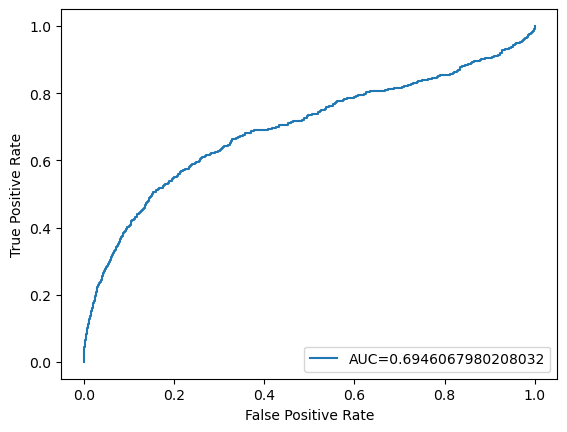

In [359]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#define metrics
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 6. Which features in the data are the most important for predicting default status (“Def_Ind”) (2 points) 
Looking at the logit regression results, variables with p-values are less than 0.05 are significant in predicting default status. They are tot_balance, avg_bal_cards, credit_age, credit_card_age, num_acc_30d_past_due_12_months, num_acc_30d_past_due_6_months, num_inq_12_month, uti_open_card, pct_card_over_50_uti, ind_XYZ, and rep_income.

In [360]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.261227
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Def_ind   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19977
Method:                           MLE   Df Model:                           22
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.1964
Time:                        15:25:26   Log-Likelihood:                -5224.5
converged:                       True   LL-Null:                       -6501.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
tot_balance                     -1.487e-06   1.64e-06     -0.907  

# [Linear Discriminant Analysis (LDA) – Multiclass Classification]

In [227]:
mp = pd.read_csv(r"/Users/yelim/Documents/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/mobile_phone_prices.csv")

## 1.	Conduct some EDA report your findings (5 marks)
There is a total of 2000 observations. There are no missing values. The classes are balanced.

In [228]:
mp.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [229]:
mp.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [208]:
mp.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [209]:
mp['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## 2.	Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

In [230]:
X2 = mp.loc[:, mp.columns != 'price_range']
y2 = mp['price_range']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=5)

## 3.	Fit the LDA model. (2 points)

In [231]:
mp_model = LinearDiscriminantAnalysis().fit(X2, y2)

## 4.	Report and interpret the accuracy, precision and recall (5 marks)
Accuracy of 0.95 means that the model makes about 95 correct predictions out 100 total examples. Precision of  0.99 for category 0 means that when the model predicts category 0 for the mobile device's price range, it is correct 99% of the time, and it applies to the other categories with its corresponding number. Recall of 0.99 means that for category 0, the model correctly identified 99% of category 0 objects.

In [239]:
y2_pred = mp_model.predict(X2_test)
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.92      0.97      0.94       148
           2       0.93      0.92      0.92       149
           3       0.99      0.95      0.97       151

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.96       600



## 5.	Produce a confusion matrix and interpret it. (4 marks)
The confustion matrix shows that the model correctly classified the objects into class 0 150 times, class 1 143 times, class 2 137 times, and class 3 143 times. The model misclassified class 0 as class 1 two times, class 1 as class 0 two times, class 1 as class 2 three times, class 2 as class 1 eleven times, and class 2 as class 3 once, and class 3 as class 2 eight times.

In [242]:
y2_pred = mp_model.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))

[[150   2   0   0]
 [  2 143   3   0]
 [  0  11 137   1]
 [  0   0   8 143]]
